In [37]:
import scipy.io
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [17]:
mat = scipy.io.loadmat("/media/mountHDD2/khoibaocon/alldata/A0011.mat")

In [18]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ECG'])

In [19]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 19 17:00:59 2017',
 '__version__': '1.0',
 '__globals__': [],
 'ECG': array([[(array(['Male'], dtype='<U4'), array([[87]], dtype=uint8), array([[ 1.83733889e-02,  3.53733889e-02,  4.73733889e-02, ...,
                 -1.76266111e-02, -1.36266111e-02, -1.06266111e-02],
                [-7.67626667e-02, -6.07626667e-02, -5.17626667e-02, ...,
                 -2.27626667e-02, -1.77626667e-02, -1.47626667e-02],
                [-9.51360556e-02, -9.61360556e-02, -9.91360556e-02, ...,
                 -5.13605556e-03, -4.13605556e-03, -4.13605556e-03],
                ...,
                [ 6.47714444e-02,  4.67714444e-02,  2.97714444e-02, ...,
                  7.71444444e-04,  1.77144444e-03,  1.77144444e-03],
                [-3.53959222e-01, -3.51959222e-01, -3.51959222e-01, ...,
                 -9.59222222e-04,  4.07777778e-05, -9.59222222e-04],
                [-7.76268056e-01, -7.64268056e-01, -7.54268056e-

In [20]:
x = mat.get("ECG")

In [21]:
type(x)

numpy.ndarray

In [22]:
x

array([[(array(['Male'], dtype='<U4'), array([[87]], dtype=uint8), array([[ 1.83733889e-02,  3.53733889e-02,  4.73733889e-02, ...,
                -1.76266111e-02, -1.36266111e-02, -1.06266111e-02],
               [-7.67626667e-02, -6.07626667e-02, -5.17626667e-02, ...,
                -2.27626667e-02, -1.77626667e-02, -1.47626667e-02],
               [-9.51360556e-02, -9.61360556e-02, -9.91360556e-02, ...,
                -5.13605556e-03, -4.13605556e-03, -4.13605556e-03],
               ...,
               [ 6.47714444e-02,  4.67714444e-02,  2.97714444e-02, ...,
                 7.71444444e-04,  1.77144444e-03,  1.77144444e-03],
               [-3.53959222e-01, -3.51959222e-01, -3.51959222e-01, ...,
                -9.59222222e-04,  4.07777778e-05, -9.59222222e-04],
               [-7.76268056e-01, -7.64268056e-01, -7.54268056e-01, ...,
                -1.72680556e-02, -1.72680556e-02, -1.62680556e-02]]))                                                             ]],
      dtype=[('

In [23]:
x.shape

(1, 1)

In [24]:
a = x[0][0]

In [25]:
type(a)

numpy.void

In [26]:
a[0]

array(['Male'], dtype='<U4')

In [27]:
a

(array(['Male'], dtype='<U4'), array([[87]], dtype=uint8), array([[ 1.83733889e-02,  3.53733889e-02,  4.73733889e-02, ...,
        -1.76266111e-02, -1.36266111e-02, -1.06266111e-02],
       [-7.67626667e-02, -6.07626667e-02, -5.17626667e-02, ...,
        -2.27626667e-02, -1.77626667e-02, -1.47626667e-02],
       [-9.51360556e-02, -9.61360556e-02, -9.91360556e-02, ...,
        -5.13605556e-03, -4.13605556e-03, -4.13605556e-03],
       ...,
       [ 6.47714444e-02,  4.67714444e-02,  2.97714444e-02, ...,
         7.71444444e-04,  1.77144444e-03,  1.77144444e-03],
       [-3.53959222e-01, -3.51959222e-01, -3.51959222e-01, ...,
        -9.59222222e-04,  4.07777778e-05, -9.59222222e-04],
       [-7.76268056e-01, -7.64268056e-01, -7.54268056e-01, ...,
        -1.72680556e-02, -1.72680556e-02, -1.62680556e-02]]))

In [28]:
a[2].shape


(12, 18000)

In [29]:
print(len(a[2][1]))

18000


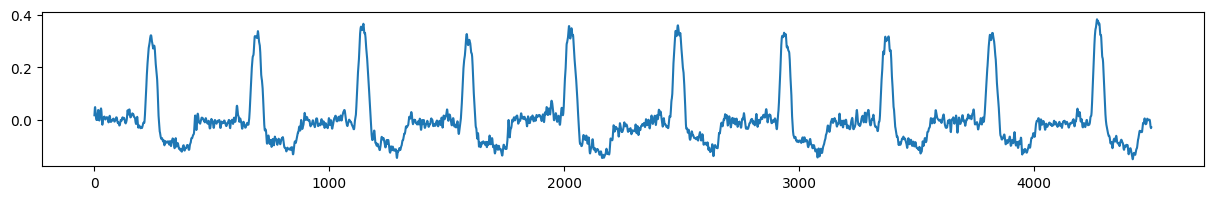

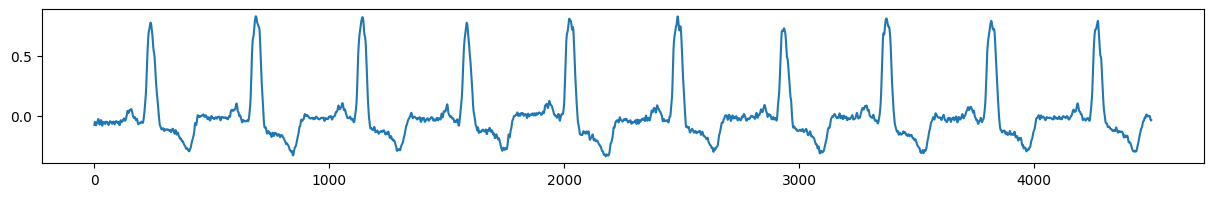

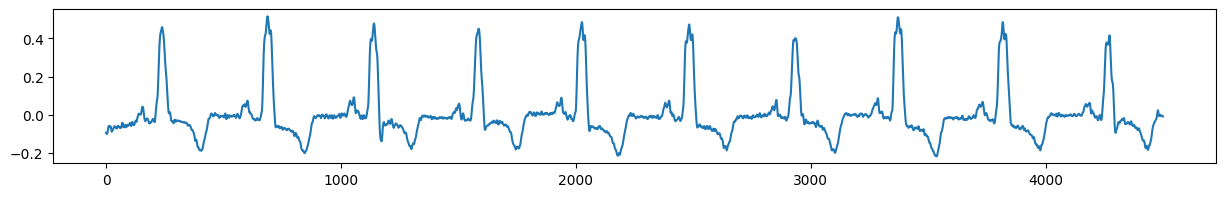

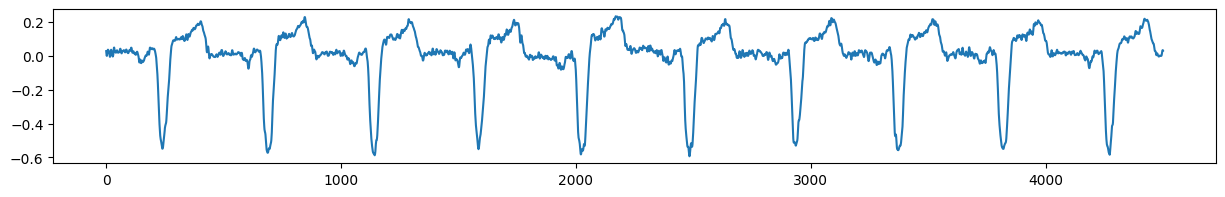

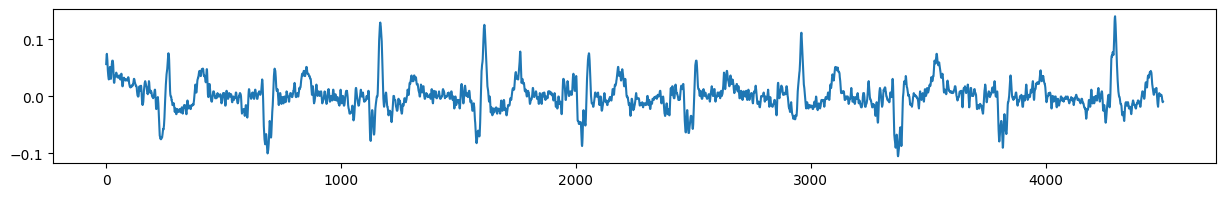

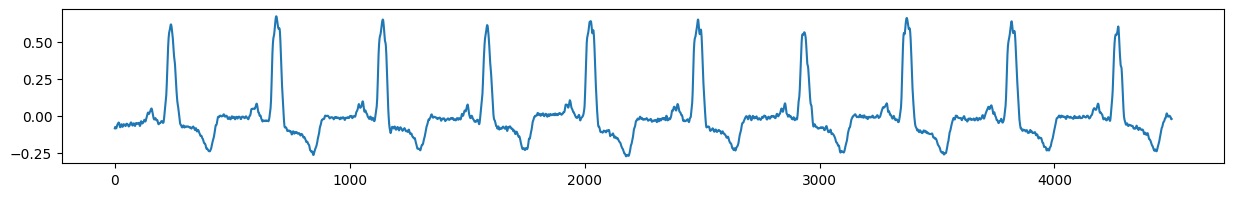

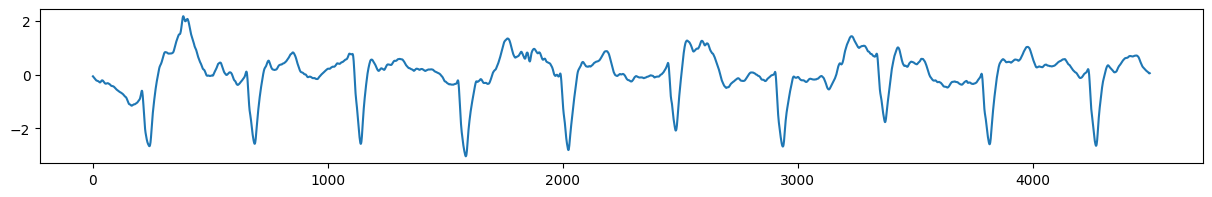

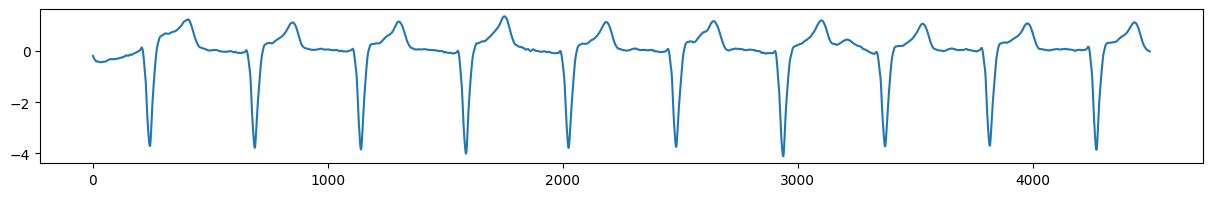

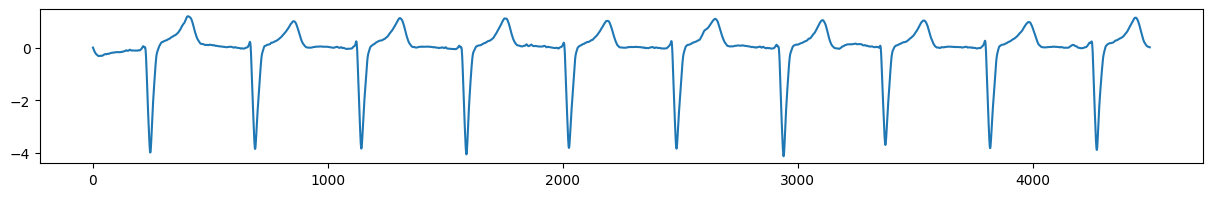

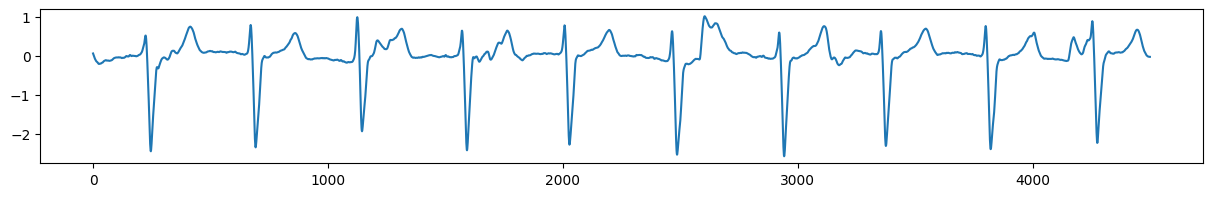

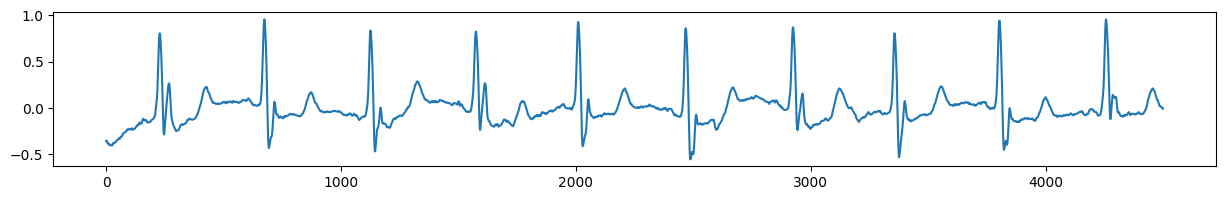

In [31]:
def plots(i):
    plt.figure(figsize = (15,2))
    plt.plot(a[2][i][:4500])

for i in range(11):
    if i % 1 ==0:
        plots(i)
# save_dir =         
# plt.savefig()


torch.Size([48, 2500])


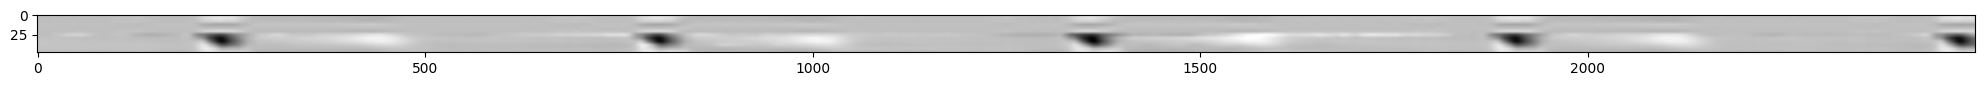

In [67]:
## Grayscale
data = scipy.io.loadmat("/media/mountHDD2/khoibaocon/alldata/A0011.mat")['ECG'][0][0][2]
clip_data = data[:, 500:2500]
clip_data = torch.tensor(clip_data, dtype=torch.float32)
normalized_data = (clip_data - clip_data.min()) / (clip_data.max() - clip_data.min())
grayscale_images = (normalized_data * 255)
grayscale_images = grayscale_images.unsqueeze(0).unsqueeze(0) # (1, 1, h, w)
resized_images = F.interpolate(grayscale_images, size=(12*4,2500), mode='bilinear', align_corners=True)
resized_images = resized_images.squeeze(0).squeeze(0)
print(resized_images.shape)
torch_data = resized_images.unsqueeze(0).repeat(3, 1, 1)
plt.figure(figsize=(25, 25))
plt.imshow(resized_images, cmap='gray', vmin=0, vmax=255)
plt.show()